# Exercise 4 

In [1]:
import math
import numpy as np
import pandas as pd
from typing import Callable
from matplotlib import pyplot as plt

In [2]:
### Generate dataset for specific dimension
def generate_data(d = 5, n=100):

    #create empty data frame
    df = pd.DataFrame()
    # 100 element array with uniform distribution between [0, 1]
    input_feature = np.random.uniform(size=[100, d])

    df = pd.DataFrame(input_feature, columns=[f'feature_{x}' for x in range(d)])
    return df

In [3]:
### Calculate lp norm distance between two points
def lp_norm(p, v1, v2):
    sumOfFeatures = 0
    for i in range(0, len(v1)):
        sumOfFeatures += abs((v2[i] - v1[i])) ** p
    l2_value = sumOfFeatures ** (1 / p)
    return l2_value


In [4]:
# # calculating l2_value for changeable amount of features
# def l2_norm(v1,v2):
#     sumOfFeatures = 0
#     for i in range(0, len(v1)):
#         sumOfFeatures += (v2[i]-v1[i])**2
#     l2_value = math.sqrt(sumOfFeatures)
#     return l2_value

In [5]:
### Calculate contrast value
def contrastValue(dMax,dMin):
    return (dMax -dMin)/ dMin

In [6]:
def get_values(dim: int, n: int, generator: Callable, p_value: int):
    """Generate samples and compute statistics

    Args:
        dim (int): Number of dimensions/features
        n (int): Number of samples
        generator (Callable): Function that generates the samples
        p_value (int): p value of lp-norm, e.g. 2 is used for l2-norm
    """
    points = generator(dim, n).to_numpy()
    min_sum = 0
    max_sum = 0
    avg_sum = 0
    diff_sum = 0
    cont_sum = 0
    for i, p1 in enumerate(points):
        distances = []
        for j, p2 in enumerate(points):
            if i == j:
                continue
            # TODO: substitute l2-norm to lp-norm
            distances.append(lp_norm(p_value, p1, p2))
        minimum = np.min(distances)
        maximum = np.max(distances)
        min_sum += minimum
        max_sum += maximum
        avg_sum += np.mean(distances)
        diff_sum += maximum - minimum
        cont_sum += contrastValue(maximum, minimum)
    avg_min = min_sum/n
    avg_max = max_sum/n
    avg_avg = avg_sum/n
    avg_diff = diff_sum/n
    avg_cont = cont_sum/n
    return pd.DataFrame([[avg_min, avg_max, avg_avg, avg_diff, avg_cont]], columns=['min', 'max', 'avg', 'diff', 'cont'])

print(get_values(3, 100, generate_data, 2))

        min      max       avg      diff      cont
0  0.123102  1.08931  0.631489  0.966208  9.455036


In [7]:
# set dimensions
dims = [1,2,3,4,5,10,20,30,40,50,60,70,80,90,100]

In [8]:
# set distance measures
p_values = [0.5, 1, 2, 3]

             min          max          avg         diff
dim                                                    
1       0.005996     0.762159     0.326373     0.756163
2       0.102826     2.881051     1.274378     2.778225
3       0.457682     5.816159     2.717162     5.358477
4       1.098439     9.251258     4.644400     8.152819
5       2.144787    13.649183     7.377963    11.504396
10     12.913158    47.598975    29.100215    34.685817
20     68.609466   170.834980   114.277147   102.225514
30    171.255522   357.759462   259.315529   186.503941
40    325.357689   614.926398   460.740340   289.568709
50    524.036836   931.181449   715.815902   407.144613
60    764.773277  1272.244003  1010.714700   507.470727
70   1074.987195  1748.651624  1396.222893   673.664428
80   1431.606063  2251.542702  1830.197669   819.936639
90   1803.742825  2796.466980  2289.896520   992.724155
100  2311.765292  3432.527709  2850.008008  1120.762417


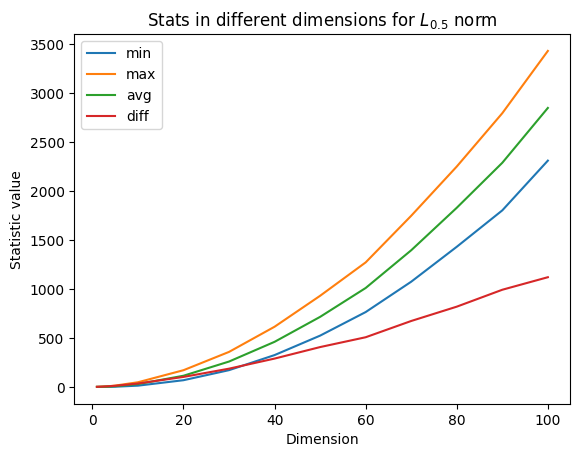

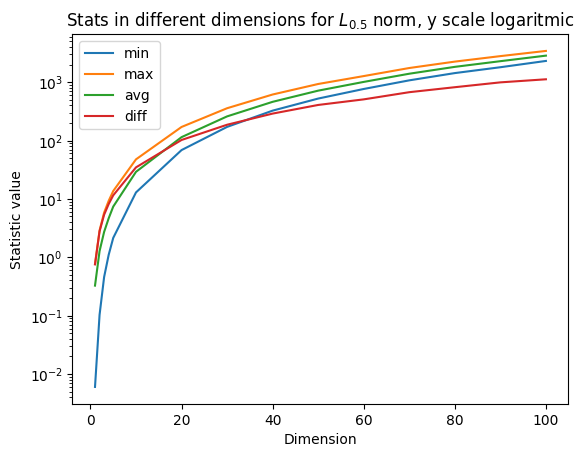

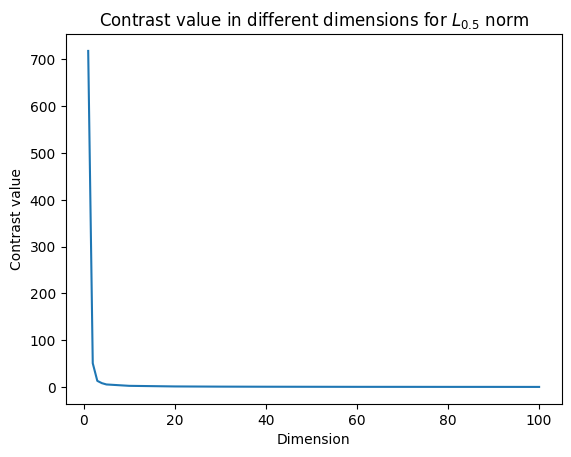

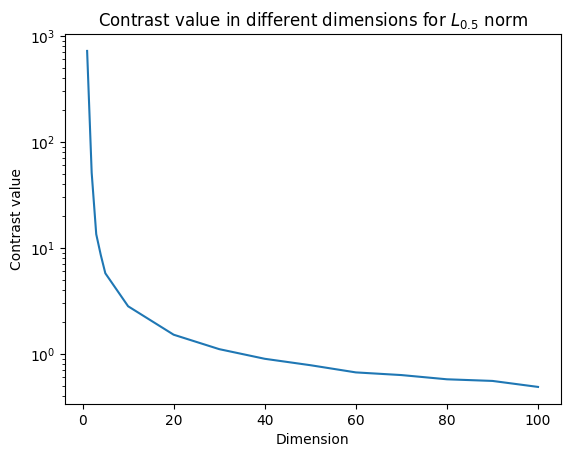

           min        max        avg       diff
dim                                            
1     0.005628   0.748283   0.336013   0.742654
2     0.066674   1.433891   0.690826   1.367217
3     0.177420   1.936589   1.007221   1.759169
4     0.383309   2.419144   1.324564   2.035835
5     0.545920   3.041977   1.711202   2.496057
10    1.634022   5.003025   3.285150   3.369003
20    4.239815   9.130877   6.699431   4.891062
30    7.131466  13.198659  10.095470   6.067193
40    9.785793  16.826008  13.282917   7.040215
50   12.685780  20.322076  16.431754   7.636296
60   15.612596  24.382480  20.013903   8.769883
70   18.704385  27.994201  23.287632   9.289815
80   21.891872  32.051348  26.886080  10.159476
90   24.847518  35.536964  30.096854  10.689445
100  27.976888  39.169664  33.473711  11.192776


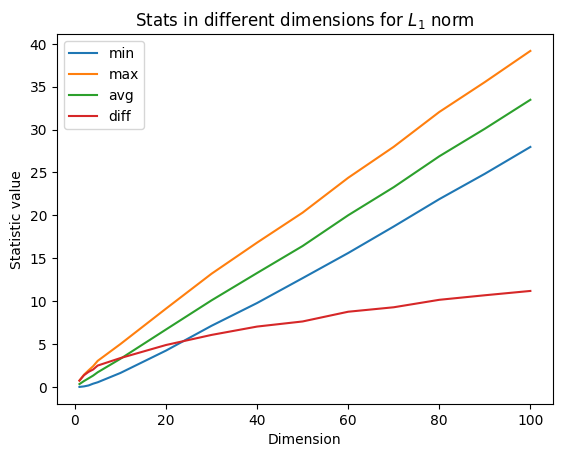

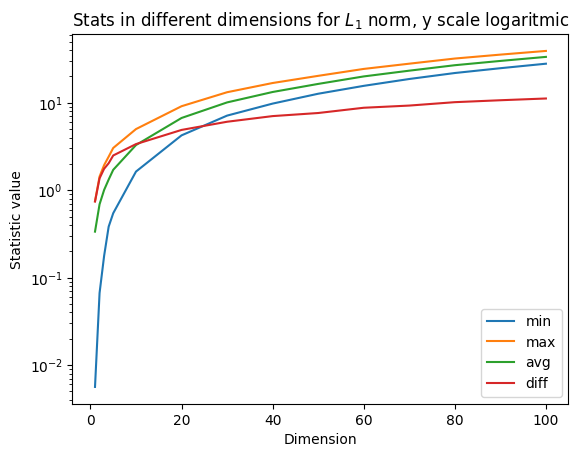

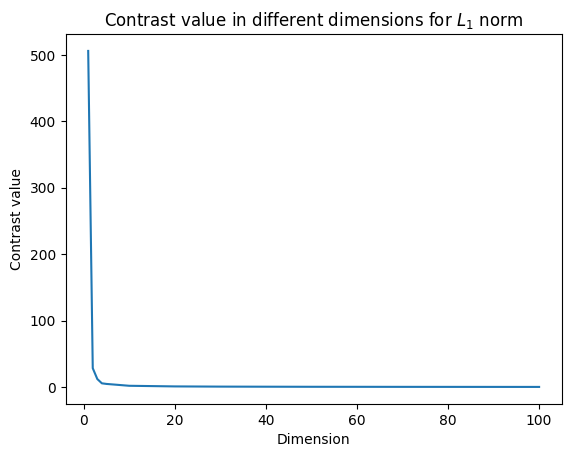

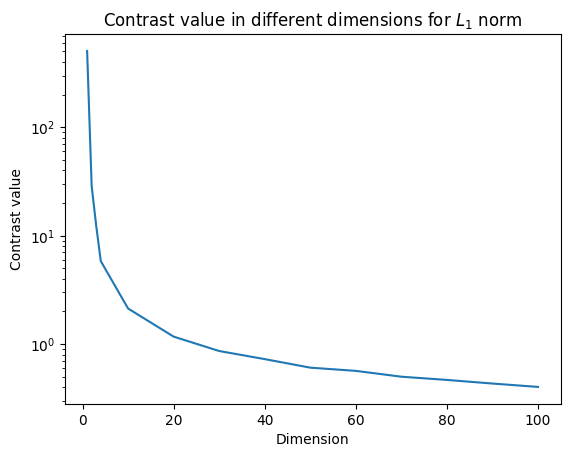

          min       max       avg      diff
dim                                        
1    0.005742  0.755518  0.349827  0.749776
2    0.054096  0.943096  0.501392  0.889001
3    0.117913  1.096074  0.641243  0.978161
4    0.224273  1.272880  0.776849  1.048607
5    0.295226  1.369230  0.892315  1.074003
10   0.676446  1.772050  1.259534  1.095605
20   1.210424  2.313500  1.802803  1.103076
30   1.645612  2.765125  2.246830  1.119513
40   2.009863  3.144466  2.591875  1.134603
50   2.278995  3.379637  2.853074  1.100642
60   2.583122  3.669070  3.160890  1.085948
70   2.830972  3.955920  3.408246  1.124948
80   3.093060  4.224269  3.664891  1.131209
90   3.264507  4.394434  3.859192  1.129926
100  3.479191  4.623026  4.047484  1.143835


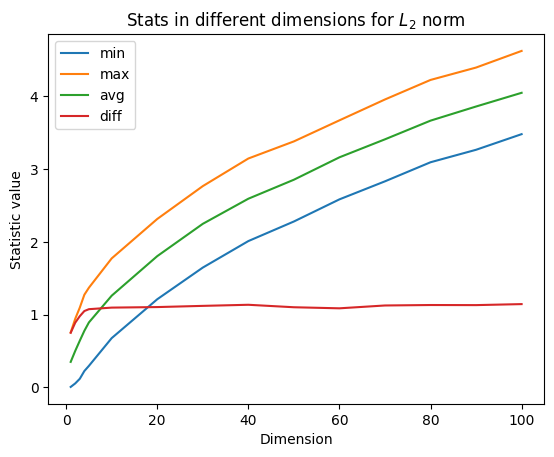

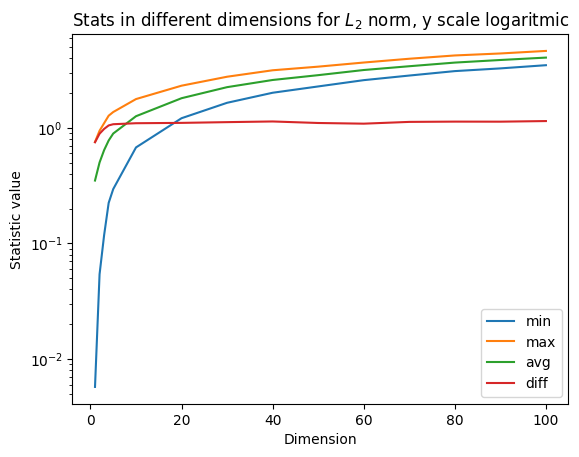

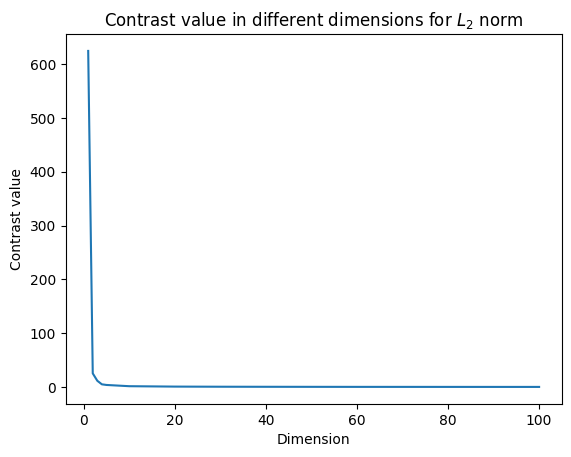

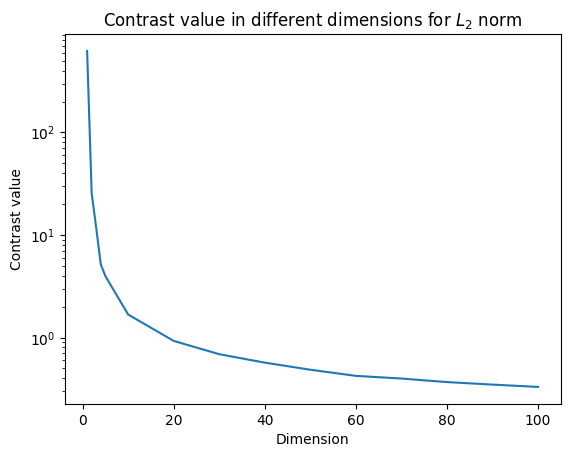

          min       max       avg      diff
dim                                        
1    0.005458  0.754771  0.344952  0.749313
2    0.051188  0.915405  0.499325  0.864217
3    0.112635  1.017638  0.613779  0.905003
4    0.181138  1.066159  0.653562  0.885021
5    0.256447  1.154622  0.764973  0.898175
10   0.517413  1.309922  0.968355  0.792508
20   0.860144  1.568054  1.251123  0.707910
30   1.080463  1.729256  1.424298  0.648793
40   1.243834  1.864226  1.577055  0.620391
50   1.389178  1.969407  1.706554  0.580230
60   1.511706  2.066134  1.810820  0.554428
70   1.585563  2.144630  1.884533  0.559067
80   1.704503  2.272582  1.996513  0.568079
90   1.801978  2.337707  2.081520  0.535729
100  1.879024  2.403266  2.154208  0.524242


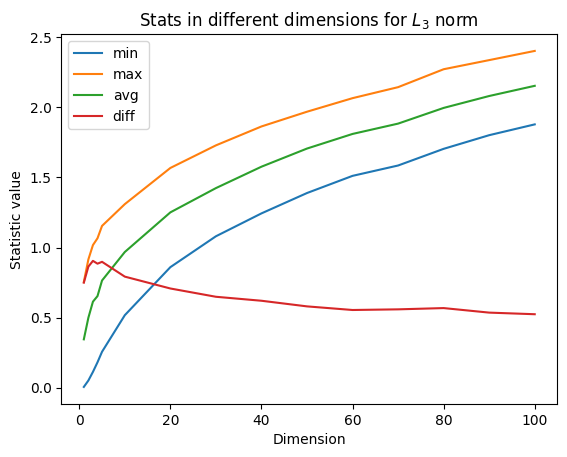

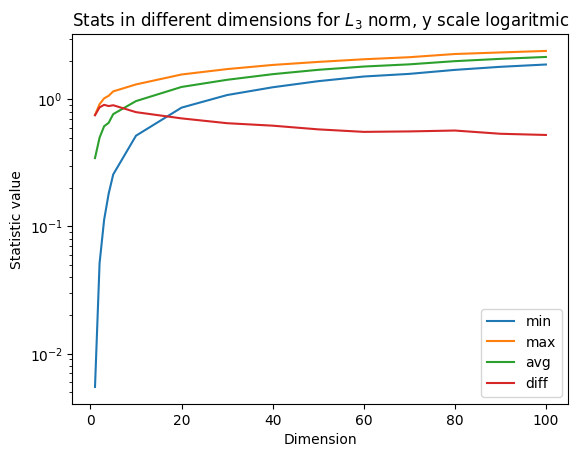

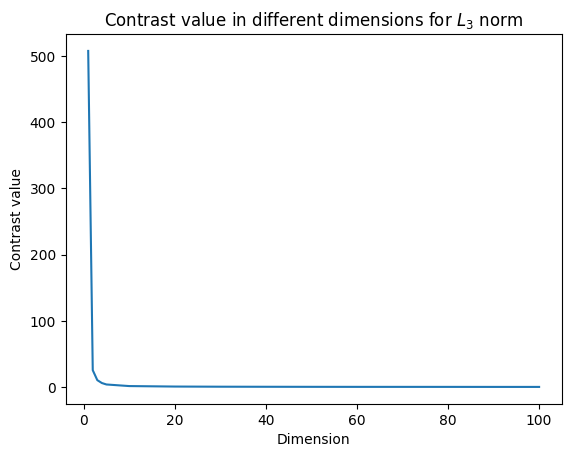

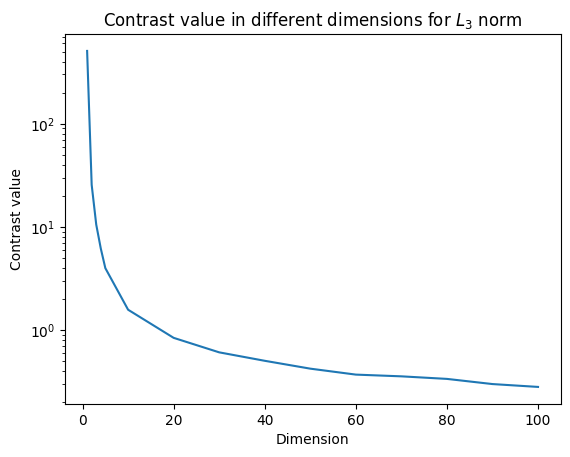

In [9]:
def plot_average_values(data: pd.DataFrame, yscale: str, p_value: int):
    """
    Args:
        data (pd.DataFrame): Input dataframe
        yscale (str, optional): y-scale value like ["linear", "log"]
    """
    plt.plot(data[["min", "max", "avg", "diff"]])
    if yscale == "log":
        plt.title("Stats in different dimensions for $L_{" + str(p_value) + "}$ norm, y scale logaritmic")
    else:
        plt.title("Stats in different dimensions for $L_{" + str(p_value) + "}$ norm")
    plt.xlabel("Dimension")
    plt.ylabel("Statistic value")
    plt.yscale(yscale)
    plt.legend(["min", "max", "avg", "diff"])
    plt.show()


def plot_contrast_value(data: pd.DataFrame, yscale: str, p_value: int):
    plt.plot(data[["cont"]])
    plt.title("Contrast value in different dimensions for $L_{" + str(p_value) + "}$ norm")
    plt.xlabel("Dimension")
    plt.ylabel("Contrast value")
    plt.yscale(yscale)
    plt.show()


# iterate over every measure and every dimension
for p_value in p_values:
    data = pd.DataFrame()
    for dim in dims:
        df = get_values(dim, 100, generate_data, p_value)
        df["dim"] = dim
        data = pd.concat([data, df], sort=False)
    # data = data.reset_index().drop('index', axis=1)
    data = data.set_index("dim")
    print(data[["min", "max", "avg", "diff"]])

    # Plot average values
    plot_average_values(data, "linear", p_value)
    plot_average_values(data, "log", p_value)

    # Plot contrast value
    plot_contrast_value(data, "linear", p_value)
    plot_contrast_value(data, "log", p_value)